In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.layers as layers



In [8]:
(train_images,train_labels),(_,_)=keras.datasets.mnist.load_data()
train_images = tf.reshape(train_images,[-1,28,28,1])
train_images = np.asarray(train_images,dtype=np.float32)
train_images = (train_images-127.5)/127.5

BATCH_SIZE = 256
BUFFER_SIZE = 60000

datasets = tf.data.Dataset.from_tensor_slices(train_images)
datasets = datasets.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [15]:
# generator
def generator_model():
    model= keras.Sequential()
    model.add(layers.Input(shape=(100,)))
    model.add(layers.Dense(256,use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(512,use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(28*28*1,use_bias=False,activation='tanh'))
    model.add(layers.BatchNormalization())

    model.add(layers.Reshape(target_shape=(28,28,1)))

    return model


In [16]:
# discriminator
def discriminator_model():
    model=keras.Sequential()
    model.add(layers.Flatten())

    model.add(layers.Dense(512,use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(256,use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(1))

    return model

In [17]:
cross_entropy = keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_out,fake_out):
    real_loss = cross_entropy(tf.ones_like(real_out),real_out)
    fake_loss = cross_entropy(tf.zeros_like(fake_out),fake_out)
    return real_loss + fake_loss

def generator_loss(fake_out):
    return cross_entropy(tf.ones_like(fake_out),fake_out)



In [18]:
generator_opt = keras.optimizers.Adam(1e-4)
discriminator_opt = keras.optimizers.Adam(1e-4)


In [19]:
generator = generator_model()
discriminator = discriminator_model()


In [20]:
noise_dim = 100

def train_step(images):
    noise = tf.random.normal([BATCH_SIZE,noise_dim])

    with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
        real_out = discriminator(images, training=True)

        gen_image = generator(noise, training=True)
        fake_out = discriminator(gen_image, training=True)

        gen_loss = generator_loss(fake_out)
        disc_loss = discriminator_loss(real_out, fake_out)
        
    gradient_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradient_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    generator_opt.apply_gradients(zip(gradient_gen, generator.trainable_variables))
    discriminator_opt.apply_gradients(zip(gradient_disc, discriminator.trainable_variables))


In [21]:
def generate_plot_image(gen_model, test_noise):
    pre_images = gen_model(test_noise, training=False)
    fig = plt.figure(figsize=(4, 4))
    for i in range(pre_images.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((pre_images[i, :, :, 0] + 1)/2, cmap='gray')
        plt.axis('off')
    plt.show()

...........................................................................................................................................................................................................................................

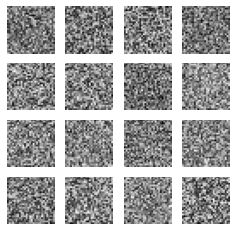

...........................................................................................................................................................................................................................................

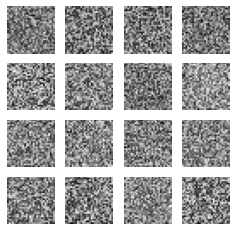

...........................................................................................................................................................................................................................................

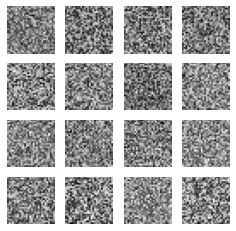

...........................................................................................................................................................................................................................................

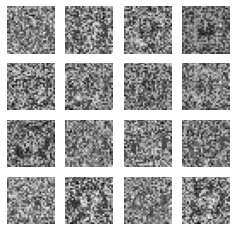

...........................................................................................................................................................................................................................................

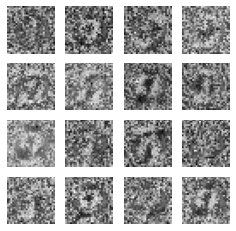

...........................................................................................................................................................................................................................................

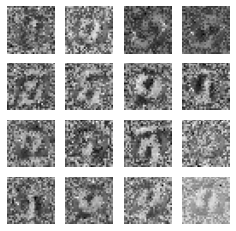

...........................................................................................................................................................................................................................................

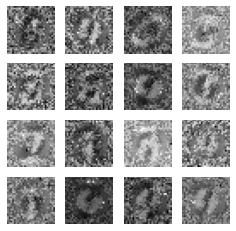

...........................................................................................................................................................................................................................................

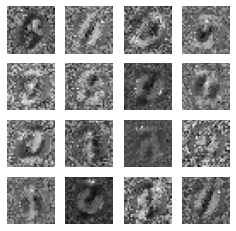

...........................................................................................................................................................................................................................................

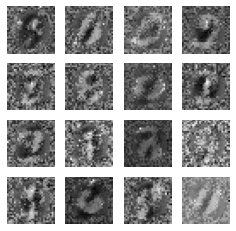

...........................................................................................................................................................................................................................................

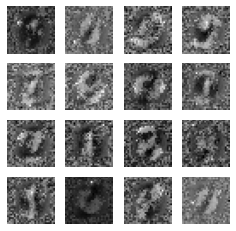

...........................................................................................................................................................................................................................................

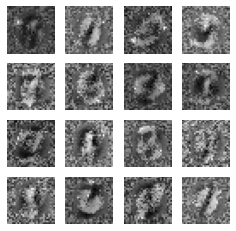

...........................................................................................................................................................................................................................................

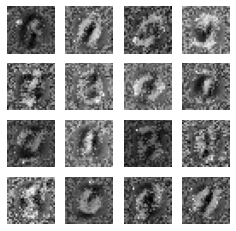

...........................................................................................................................................................................................................................................

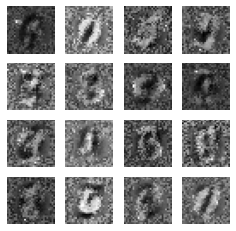

...........................................................................................................................................................................................................................................

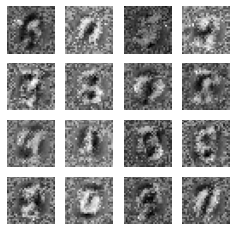

...........................................................................................................................................................................................................................................

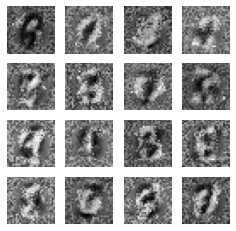

...........................................................................................................................................................................................................................................

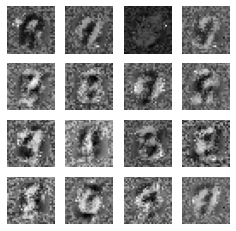

...........................................................................................................................................................................................................................................

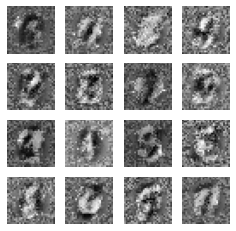

...........................................................................................................................................................................................................................................

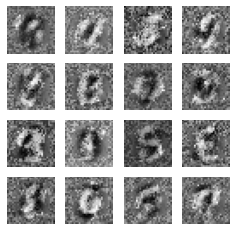

...........................................................................................................................................................................................................................................

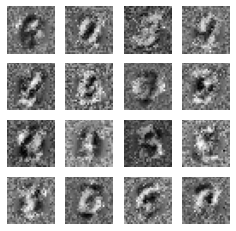

...........................................................................................................................................................................................................................................

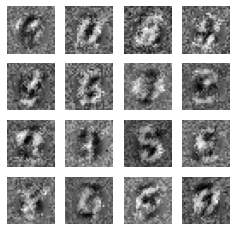

...........................................................................................................................................................................................................................................

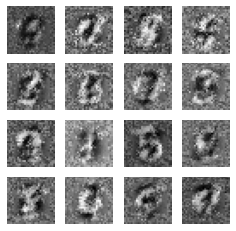

...........................................................................................................................................................................................................................................

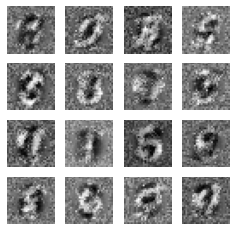

...........................................................................................................................................................................................................................................

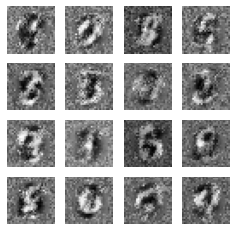

...........................................................................................................................................................................................................................................

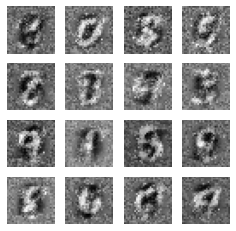

...........................................................................................................................................................................................................................................

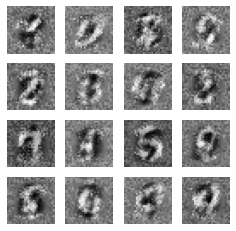

...........................................................................................................................................................................................................................................

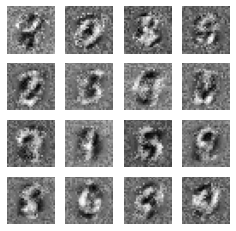

...........................................................................................................................................................................................................................................

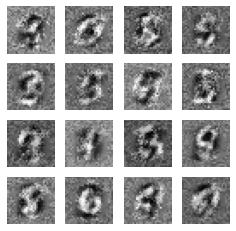

...........................................................................................................................................................................................................................................

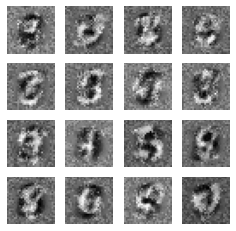

...........................................................................................................................................................................................................................................

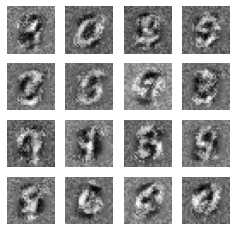

...........................................................................................................................................................................................................................................

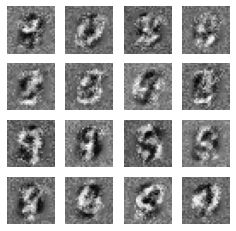

...........................................................................................................................................................................................................................................

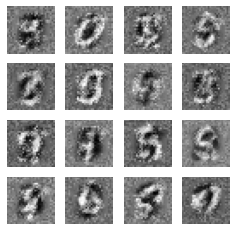

...........................................................................................................................................................................................................................................

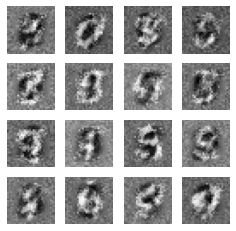

...........................................................................................................................................................................................................................................

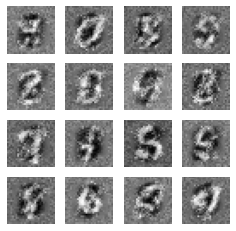

...........................................................................................................................................................................................................................................

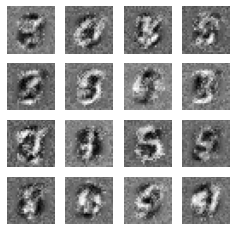

...........................................................................................................................................................................................................................................

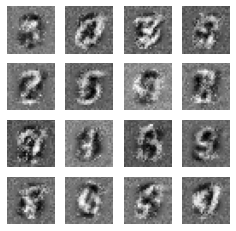

...........................................................................................................................................................................................................................................

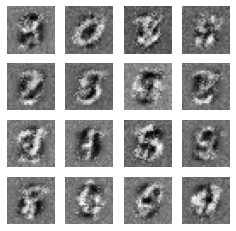

...........................................................................................................................................................................................................................................

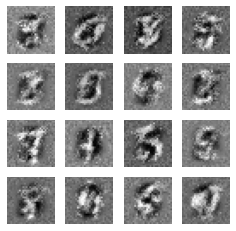

...........................................................................................................................................................................................................................................

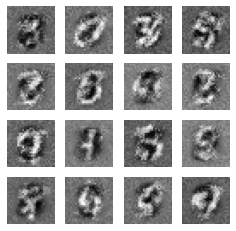

...........................................................................................................................................................................................................................................

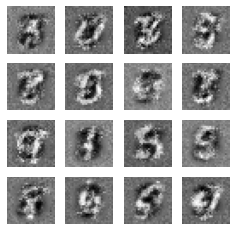

...........................................................................................................................................................................................................................................

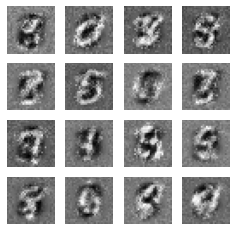

...........................................................................................................................................................................................................................................

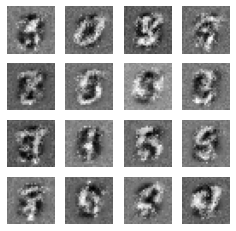

...........................................................................................................................................................................................................................................

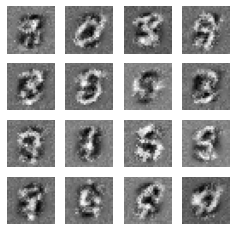

...........................................................................................................................................................................................................................................

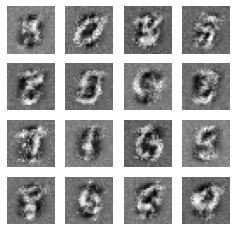

...........................................................................................................................................................................................................................................

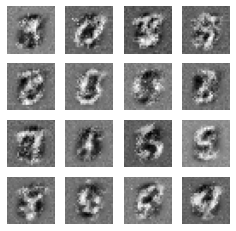

...........................................................................................................................................................................................................................................

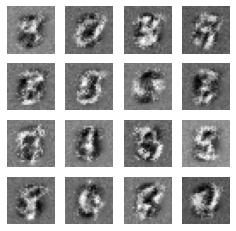

...........................................................................................................................................................................................................................................

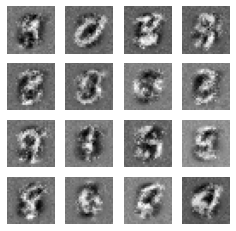

...........................................................................................................................................................................................................................................

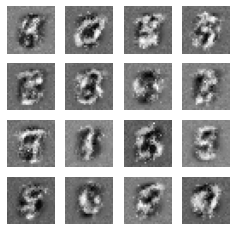

...........................................................................................................................................................................................................................................

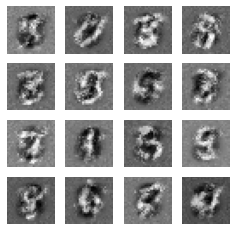

...........................................................................................................................................................................................................................................

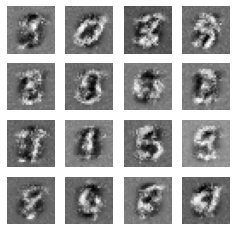

...........................................................................................................................................................................................................................................

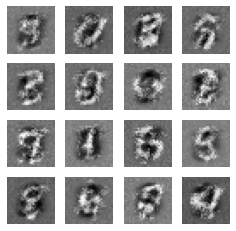

...........................................................................................................................................................................................................................................

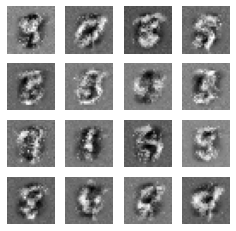

...........................................................................................................................................................................................................................................

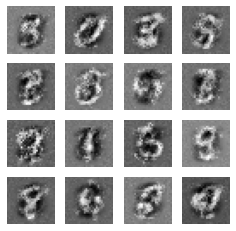

...........................................................................................................................................................................................................................................

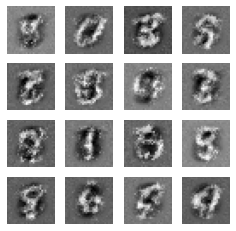

...........................................................................................................................................................................................................................................

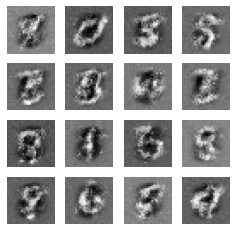

...........................................................................................................................................................................................................................................

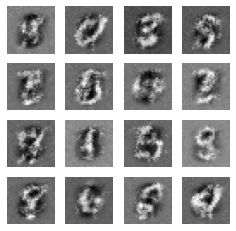

...........................................................................................................................................................................................................................................

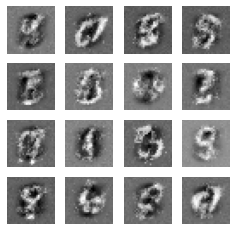

...........................................................................................................................................................................................................................................

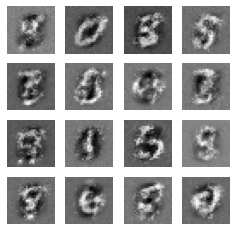

...........................................................................................................................................................................................................................................

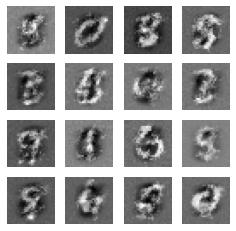

...........................................................................................................................................................................................................................................

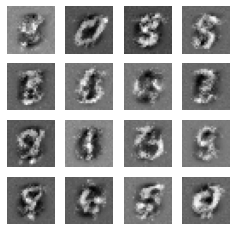

...........................................................................................................................................................................................................................................

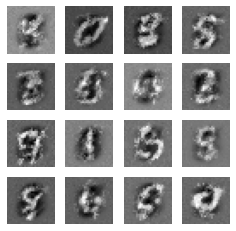

...........................................................................................................................................................................................................................................

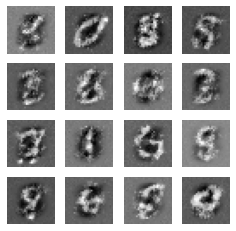

...........................................................................................................................................................................................................................................

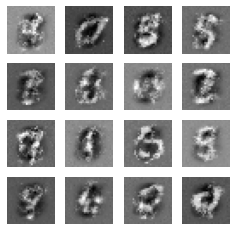

...........................................................................................................................................................................................................................................

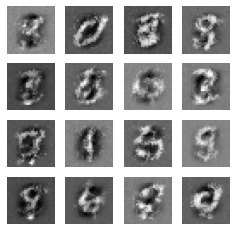

...........................................................................................................................................................................................................................................

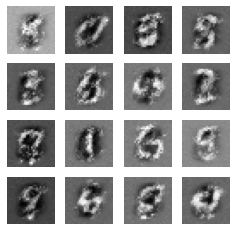

...........................................................................................................................................................................................................................................

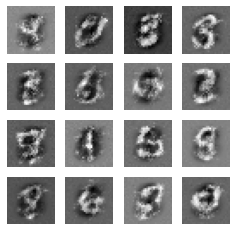

...........................................................................................................................................................................................................................................

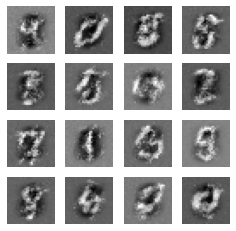

...........................................................................................................................................................................................................................................

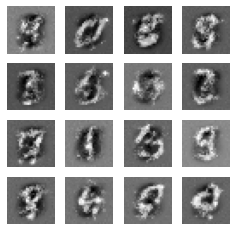

...........................................................................................................................................................................................................................................

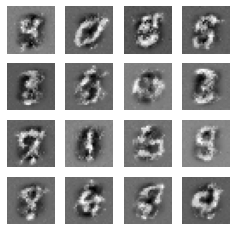

...........................................................................................................................................................................................................................................

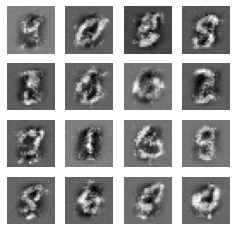

...........................................................................................................................................................................................................................................

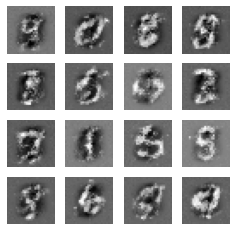

...........................................................................................................................................................................................................................................

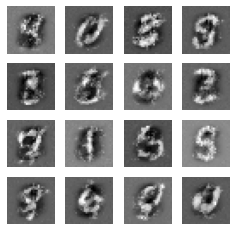

...........................................................................................................................................................................................................................................

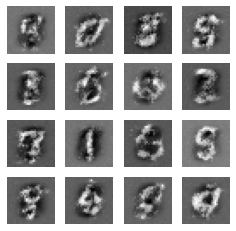

...........................................................................................................................................................................................................................................

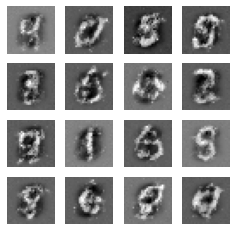

...........................................................................................................................................................................................................................................

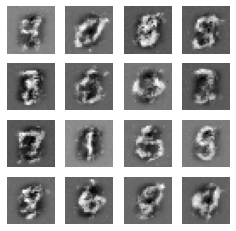

...........................................................................................................................................................................................................................................

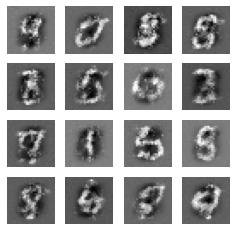

...........................................................................................................................................................................................................................................

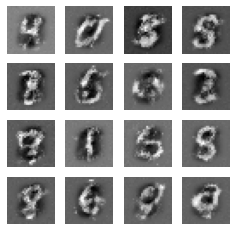

...........................................................................................................................................................................................................................................

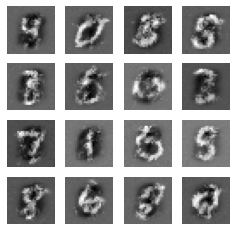

...........................................................................................................................................................................................................................................

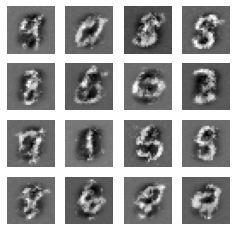

...........................................................................................................................................................................................................................................

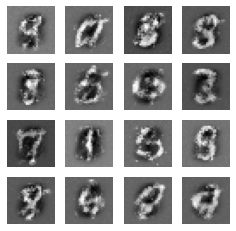

...........................................................................................................................................................................................................................................

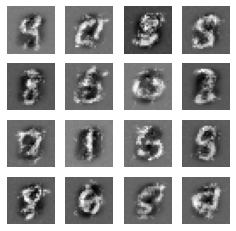

...........................................................................................................................................................................................................................................

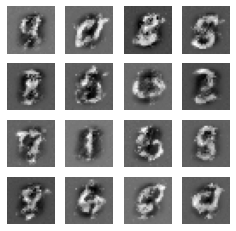

...........................................................................................................................................................................................................................................

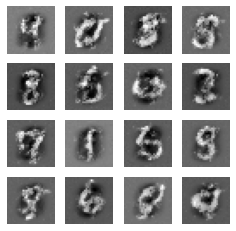

...........................................................................................................................................................................................................................................

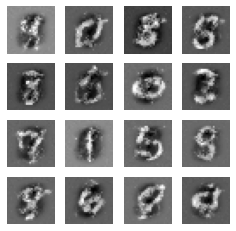

...........................................................................................................................................................................................................................................

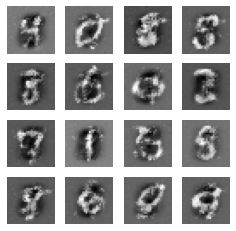

...........................................................................................................................................................................................................................................

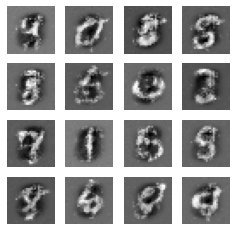

...........................................................................................................................................................................................................................................

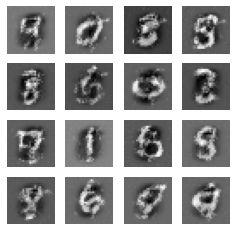

...........................................................................................................................................................................................................................................

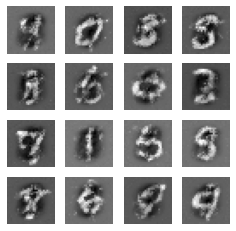

...........................................................................................................................................................................................................................................

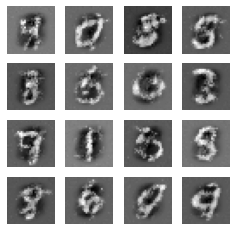

...........................................................................................................................................................................................................................................

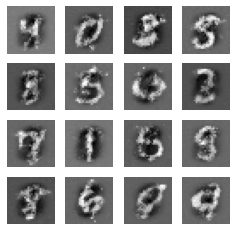

...........................................................................................................................................................................................................................................

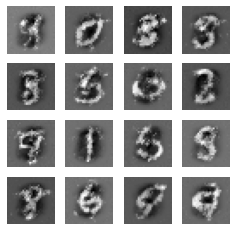

...........................................................................................................................................................................................................................................

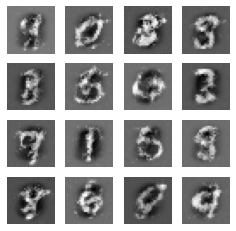

...........................................................................................................................................................................................................................................

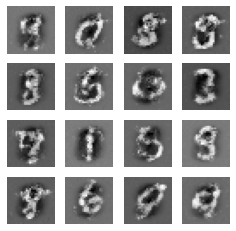

...........................................................................................................................................................................................................................................

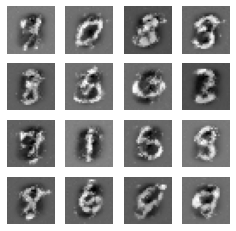

...........................................................................................................................................................................................................................................

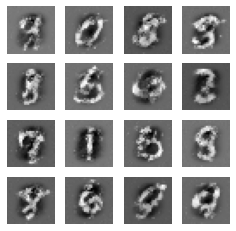

...........................................................................................................................................................................................................................................

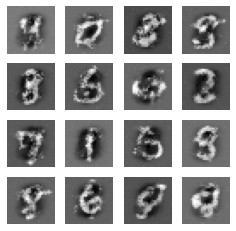

...........................................................................................................................................................................................................................................

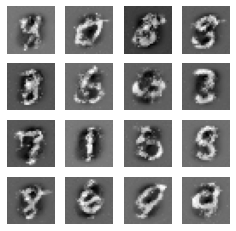

...........................................................................................................................................................................................................................................

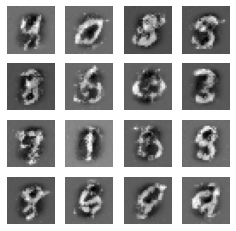

...........................................................................................................................................................................................................................................

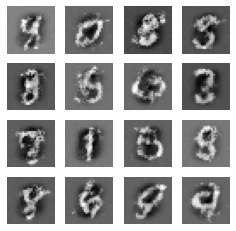

...........................................................................................................................................................................................................................................

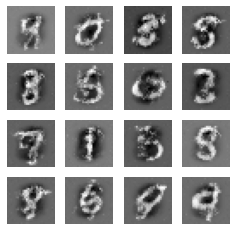

...........................................................................................................................................................................................................................................

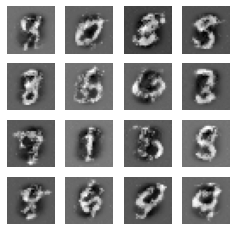

In [22]:
EPOCHS = 100  # 训练100次
num_exp_to_generate = 16  # 生成16张图片
seed = tf.random.normal([num_exp_to_generate, noise_dim])  # 16组随机数组，每组含100个随机数，用来生成16张图片。

def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)
            print('.', end='')
        generate_plot_image(generator, seed)
train(datasets, EPOCHS)